In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
metrics_path = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_18"


training_metrics = pd.read_csv(f"{metrics_path}/metrics.csv")


training_metrics.columns

Index(['brier_score', 'epoch', 'lr_find/suggested_lr', 'multilabel_f1_macro',
       'multilabel_f1_micro', 'multilabel_f1_weighted', 'step',
       'train_brier_Atelectasis_epoch', 'train_brier_Atelectasis_step',
       'train_brier_Cardiomegaly_epoch', 'train_brier_Cardiomegaly_step',
       'train_brier_Consolidation_epoch', 'train_brier_Consolidation_step',
       'train_brier_Edema_epoch', 'train_brier_Edema_step',
       'train_brier_Effusion_epoch', 'train_brier_Effusion_step',
       'train_brier_Emphysema_epoch', 'train_brier_Emphysema_step',
       'train_brier_Fibrosis_epoch', 'train_brier_Fibrosis_step',
       'train_brier_Hernia_epoch', 'train_brier_Hernia_step',
       'train_brier_Infiltration_epoch', 'train_brier_Infiltration_step',
       'train_brier_Mass_epoch', 'train_brier_Mass_step',
       'train_brier_No Finding_epoch', 'train_brier_No Finding_step',
       'train_brier_Nodule_epoch', 'train_brier_Nodule_step',
       'train_brier_Pleural_Thickening_epoch',
   

In [16]:
training_metrics

,brier_score,epoch,lr_find/suggested_lr,multilabel_f1_macro,multilabel_f1_micro,multilabel_f1_weighted,step,train_brier_Atelectasis_epoch,train_brier_Atelectasis_step,train_brier_Cardiomegaly_epoch,...,val_brier_Mass,val_brier_No Finding,val_brier_Nodule,val_brier_Pleural_Thickening,val_brier_Pneumonia,val_brier_Pneumothorax,val_loss,val_multilabel_f1_macro,val_multilabel_f1_micro,val_multilabel_f1_weighted
0,NaN,NaN,0.000001,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,NaN,NaN,49,NaN,0.322720,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,NaN,99,NaN,0.302875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.0,NaN,NaN,NaN,NaN,149,NaN,0.291171,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,NaN,NaN,NaN,NaN,199,NaN,0.283258,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,NaN,49.0,NaN,NaN,NaN,NaN,26949,NaN,0.209614,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,49.0,NaN,NaN,NaN,NaN,26999,NaN,0.209596,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,49.0,NaN,NaN,NaN,NaN,27049,NaN,0.209579,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,0.191086,49.0,NaN,NaN,NaN,NaN,27049,NaN,NaN,NaN,...,0.208251,0.215283,0.229754,0.20692,0.209237,0.186649,1.096289,0.185317,0.26842,0.465356


In [24]:
columns_to_keep = ['train_loss', 'val_loss', 'epoch']

# Drop all columns except the ones you want to keep
train_val_metrics = training_metrics.drop(columns=training_metrics.columns.difference(columns_to_keep), axis=1)

train_val_metrics_grouped = train_val_metrics.groupby("epoch").mean()

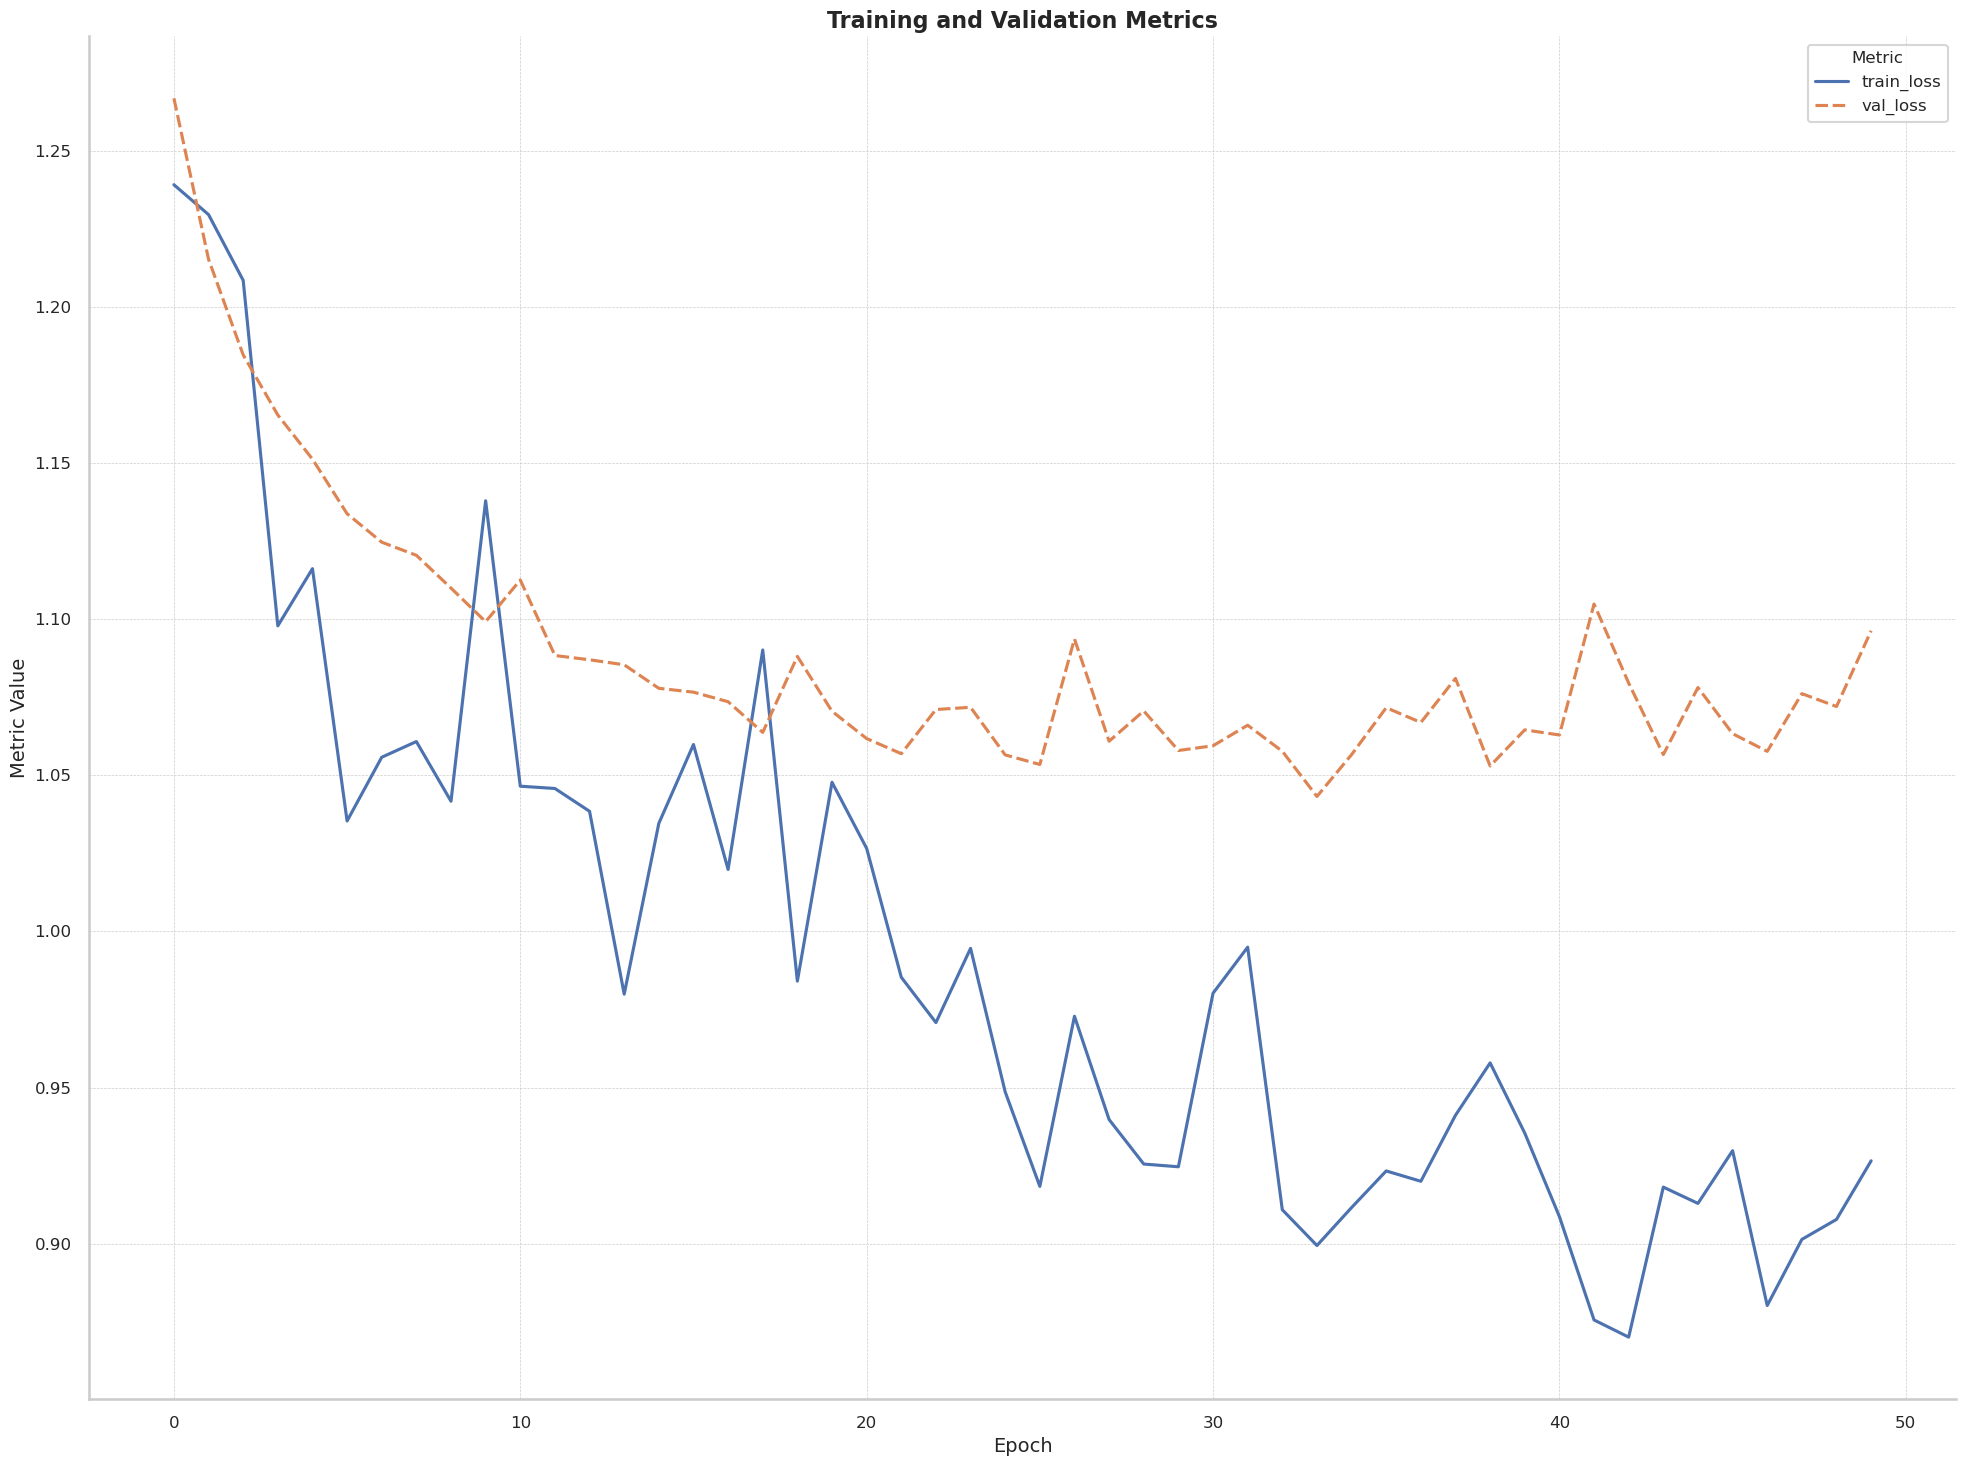

In [30]:
sns.set(style="whitegrid", context="talk")  # "talk" or "paper" for academic feel

plt.figure(figsize=(20, 15))  # More standard academic size

# Plot the data
sns.lineplot(data=train_val_metrics_grouped)

# Title and labels
plt.title("Training and Validation Metrics", fontsize=16, weight='bold')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)

# Remove top and right spines
sns.despine()

# Ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Optional: Legend
plt.legend(title="Metric", title_fontsize=12, fontsize=12, loc='best')

plt.tight_layout()
plt.savefig("training_and_validation_metrics.png")
plt.show()


<Axes: >

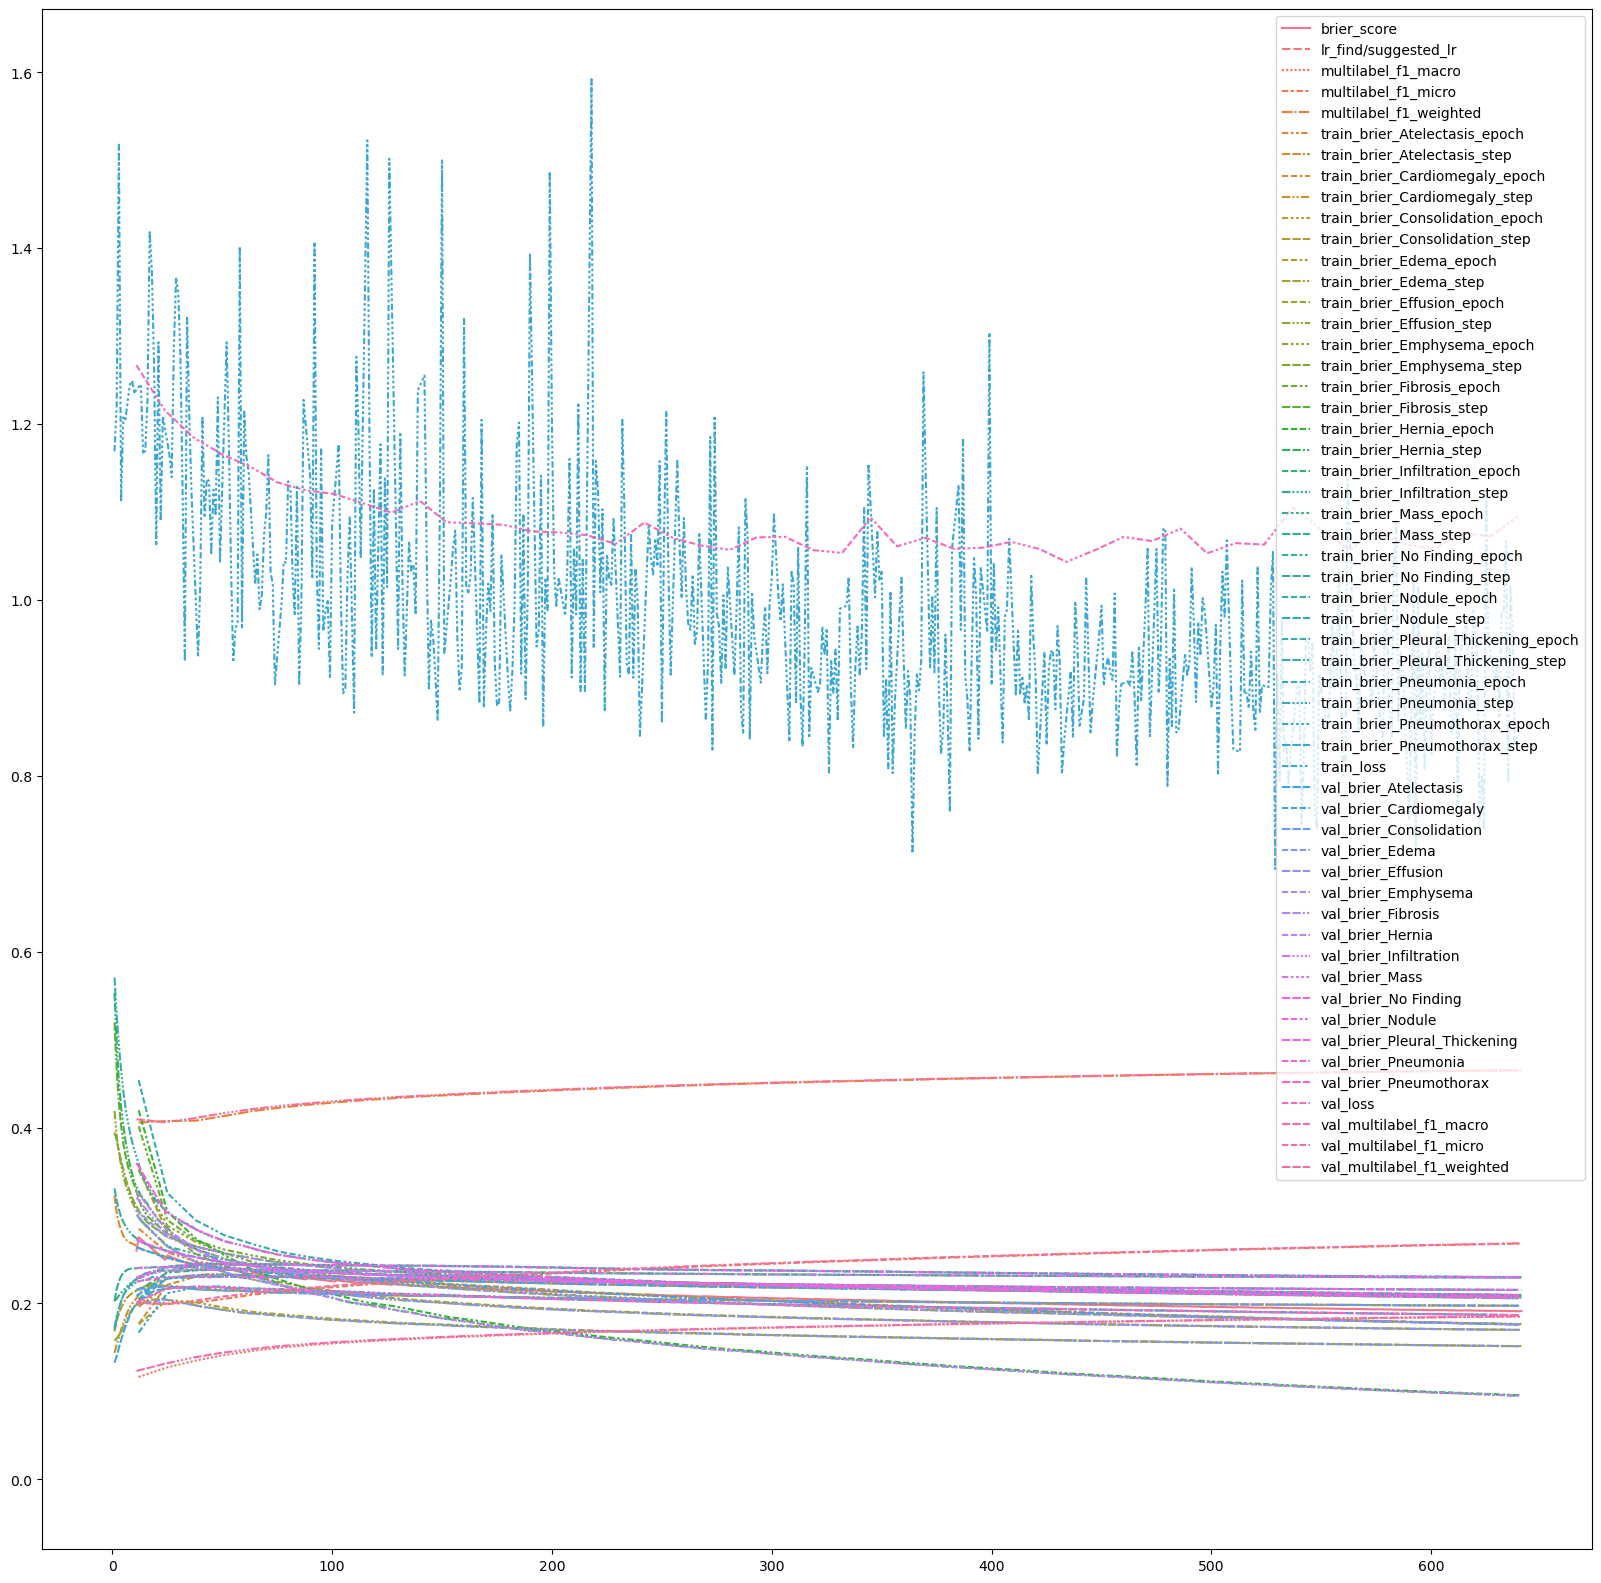

In [4]:

plt.figure(figsize = (20, 20))
sns.lineplot(data = training_metrics.drop(columns = ['step', 'epoch']))

In [7]:
pd.read_csv("/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_17/checkpoint_evaluation/test_multi_metrics_per_label_threshold.csv")

,Unnamed: 0,No Finding,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,micro avg,macro avg,weighted avg,samples avg
0,precision,0.529280,0.237001,0.226644,0.328380,0.331180,0.134625,0.126230,0.049226,0.296635,0.121180,0.112958,0.125448,0.054865,0.112029,0.084337,0.249463,0.191334,0.314867,0.327656
1,recall,0.624176,0.528210,0.367633,0.711679,0.687827,0.469108,0.276648,0.189189,0.463039,0.683747,0.580541,0.480329,0.416092,0.272966,0.488372,0.573151,0.482637,0.573151,0.580623
2,f1-score,0.572825,0.327194,0.280414,0.449400,0.447091,0.209210,0.173359,0.078125,0.361612,0.205873,0.189118,0.198939,0.096947,0.158859,0.143836,0.347623,0.259520,0.391277,0.387404
3,support,9861.000000,3279.000000,1069.000000,4658.000000,6112.000000,1748.000000,1623.000000,555.000000,2665.000000,1815.000000,925.000000,1093.000000,435.000000,1143.000000,86.000000,37067.000000,37067.000000,37067.000000,37067.000000


In [39]:
predicted_path = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_15/all_pred_labels.csv"
preds = pd.read_csv(predicted_path, index_col = 0)

In [6]:
pr_path_no_weighting = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_15/pr_auc_per_label.csv"

not_weighted = pd.read_csv(pr_path_no_weighting)

In [7]:
pr_path_weighting = "/rds/general/user/ojf24/home/ml_project/vit_pretrained_fine_tune/tensorboard_logs/nih_cxr_pretrained_vit/version_16/checkpoint_evaluation/pr_auc_per_label.csv"
weighted = pd.read_csv(pr_path_weighting)

In [17]:
merged = pd.merge(not_weighted, weighted, on = "label")

<Axes: xlabel='variable', ylabel='value'>

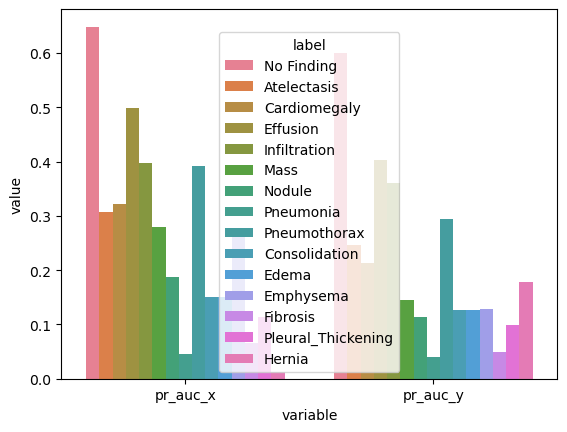

In [22]:
merged_long = pd.melt(merged, id_vars = "label", value_vars=['pr_auc_x', 'pr_auc_y'])

plt.figure(figsize = ())
sns.barplot(data = merged_long, x = "variable", y = "value", hue = "label")